In [53]:
##daten auslesen

path = r'C:\Users\samse\OneDrive\Desktop\RLC_Circuit_JonasVersion_Q.txt'

# Liste zum Speichern der Werte in der zweiten Spalte
spalte_eins_x = [] #frequenz
spalte_zwei_y1 = [] #dB
spalte_drei_y2 = [] #phase


# Textdokument öffnen und Zeilenweise lesen
with open(path, 'r') as datei:

    next(datei) #erste zeile überspringen

    for zeile in datei:
        # Die Zeile in Spalten aufteilen (angenommen, die Spalten sind durch Leerzeichen oder Tabulatoren getrennt)
        spalten = zeile.strip().split('\t')  # Hier aufpassen, wie die Spalten getrennt sind
        
        spalte_eins_x.append(float(spalten[0]))
        
        # Die anderen Spalten könnten Kommas enthalten, daher trennen wir sie weiter
        spalte2_und_3 = spalten[1].split(',')
        spalte_zwei_y1.append(float(spalte2_und_3[0]))
        spalte_drei_y2.append(float(spalte2_und_3[1]))


#print("Spalte 1:", spalte_drei_y2)


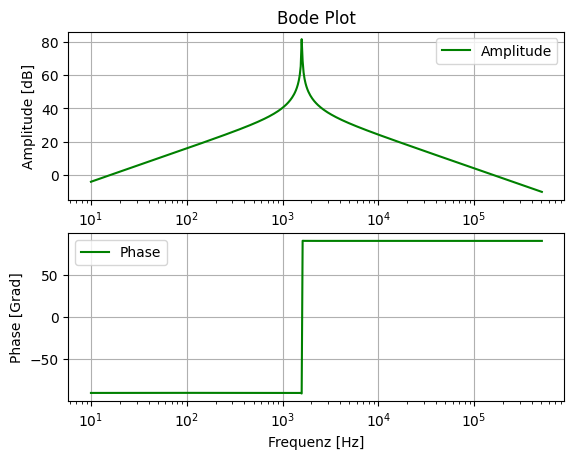

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal




import numpy as np 
import matplotlib.pyplot as plt 

# plot with two axes
def plot_with_two_axes_and_additional_data(data_x, data_y_one, data_y_two, name_x, name_y1, name_y2, plot_title="title", filename_to_save="LOL.pdf", xmin=-1000, xmax=110000, ymin1=-20, ymax1=100, ymin2=280, ymax2=-80):
    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel(name_x) 
    ax1.set_ylabel(name_y1, color = 'red') 
    plot_1 = ax1.plot(data_x, data_y_one, color = 'red', label='impedance') 
    ax1.tick_params(axis ='y') #, labelcolor = 'red') 
    # ax1.ylim(0,.9)
    # ax1.xlim(0,.9)
    ax1.set_xlim([xmin, xmax])
    ax1.set_ylim([ymin1, ymax1])

    ax2 = ax1.twinx() 
    ax2.set_ylabel(name_y2, color = 'blue') 
    plot_2 = ax2.plot(data_x, data_y_two, color = 'blue', label = 'phase') 
    ax2.tick_params(axis ='y') #, labelcolor = 'blue') 

    #ax3 = ax1.twinx() 
    #ax3.spines['right'].set_position(('outward', 60))
    #ax3.set_ylabel(name_y3, color = 'green') 
    #plot_3 = ax3.plot(data_x, data_y_three, color = 'green', label = 'additional') 
    #ax3.tick_params(axis ='y') #, labelcolor = 'blue') 

    ax1.set_xlim([xmin, xmax])
    ax2.set_ylim([ymin2, ymax2])
    #ax3.set_ylim([ymin3, ymax3])
    
    fig.tight_layout()

    lns = plot_1 + plot_2 #+ plot_3
    labels = [l.get_label() for l in lns]
    
    plt.title(plot_title)
    plt.legend(lns, labels, loc=0)
    
    fnts =  filename_to_save + ".pdf"
    plt.savefig(fnts)
    plt.show()



x = "frequency [Hz]"
y1 = "[dB]"
y2 = "phase [°]"




#plot_with_two_axes_and_additional_data(spalte_eins_x, spalte_zwei_y1, spalte_drei_y2, x,y1,y2, plot_title="RLC_Circuit", filename_to_save="LOL.pdf", xmin=-1000, xmax=110000, ymin1=-20, ymax1=100, ymin2=280, ymax2=-80)



frequenzen = np.array(spalte_eins_x)  # Frequenzen in Hertz
amplitude_dB = np.array(spalte_zwei_y1)  # Amplituden in dB
phase_deg = np.array(spalte_drei_y2)  # Phasen in Grad

# Konvertiere Amplituden in lineare Skala
amplitude = 10 ** (amplitude_dB / 20.0)

# Bode-Plot erstellen
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(frequenzen, amplitude_dB, linestyle='-', label='Amplitude', color = 'green')
plt.title('Bode Plot')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(frequenzen, phase_deg, linestyle='-', label='Phase', color = 'green')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Grad]')
plt.grid()
plt.legend()

plt.show()

plt.savefig('Bode Plot RLC Circuit.png')
